<a href="https://colab.research.google.com/github/LeevesC/DeepLearningAmt/blob/main/DeepLearning_asm2_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
import seaborn as sns

In [ ]:
df = pd.read_csv("./sample_data/cat_img/cat_dog.csv")
df.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['labels'])
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

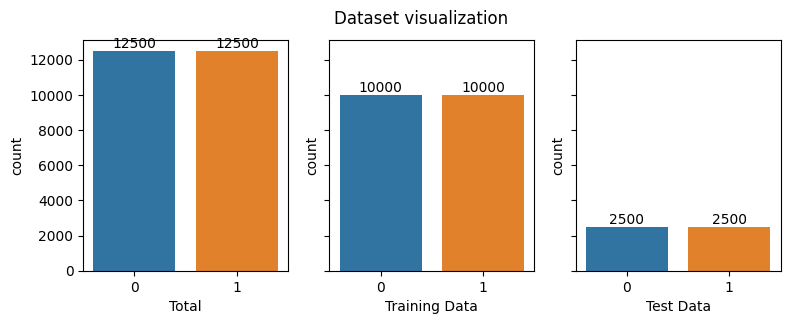

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))
barplot1 = sns.countplot(x='labels',data=df, ax=ax[0])
barplot2 = sns.countplot(x='labels',data=train_df, ax=ax[1])
barplot3 = sns.countplot(x='labels',data=test_df, ax=ax[2])


ax[0].bar_label(barplot1.containers[0])
ax[1].bar_label(barplot2.containers[0])
ax[2].bar_label(barplot3.containers[0])

ax[0].set_xlabel('Total')
ax[1].set_xlabel('Training Data')
ax[2].set_xlabel('Test Data')
fig.suptitle('Dataset visualization')
plt.show()

In [ ]:
temp = []
for img_name in train_df.image:
    img_path = os.path.join("./sample_data/cat_img/cat_dog/", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

# test image
temp = []
for img_name in test_df.image:
    img_path = os.path.join("./sample_data/cat_img/cat_dog/", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

<ipython-input-5-ffae0b24e934>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
<ipython-input-5-ffae0b24e934>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train_df.labels)
train_y = to_categorical(train_y)
test_y = lb.fit_transform(test_df.labels)
test_y = to_categorical(test_y)

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

# Load the VGG16 model with weights pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# unfreeze several layers of the VGG16 model
for layer in base_model.layers[-2:]:
    layer.trainable = True


# Create a sequential model
model = Sequential()

# Add the base VGG16 model
model.add(base_model)

# Add global average pooling layer
model.add(GlobalAveragePooling2D())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/40
250/250 [==============================] - 4s 15ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 1.0332 - val_accuracy: 0.8537
Epoch 2/40
250/250 [==============================] - 4s 14ms/step - loss: 0.1634 - accuracy: 0.9354 - val_loss: 0.4534 - val_accuracy: 0.8370
Epoch 3/40
250/250 [==============================] - 4s 14ms/step - loss: 0.0883 - accuracy: 0.9657 - val_loss: 0.5655 - val_accuracy: 0.8508
Epoch 4/40
250/250 [==============================] - 4s 14ms/step - loss: 0.0435 - accuracy: 0.9844 - val_loss: 0.7724 - val_accuracy: 0.8595
Epoch 5/40
250/250 [==============================] - 4s 14ms/step - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.6888 - val_accuracy: 0.8562
Epoch 6/40
250/250 [==============================] - 4s 14ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.6606 - val_accuracy: 0.8625
Epoch 7/40
250/250 [==============================] - 4s 14ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.8501 - val_accuracy: 0.8608

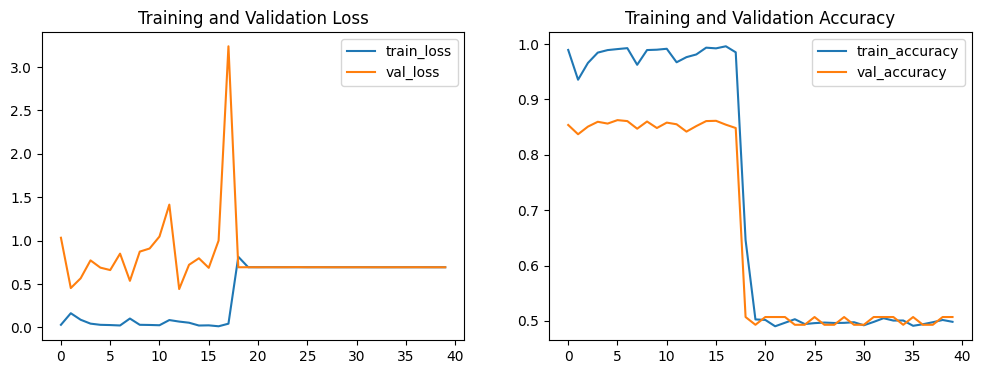

157/157 [==============================] - 1s 3ms/step


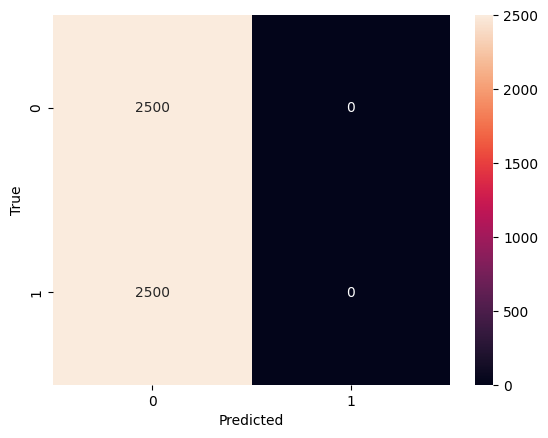

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=40, batch_size=64, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## ResNet

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

# Load the ResNet101 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the ResNet101 model
for layer in base_model.layers:
    layer.trainable = False

# Create a sequential model
model = Sequential()

# Add the base ResNet101 model
model.add(base_model)

# Add global average pooling layer
model.add(GlobalAveragePooling2D())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
125/125 [==============================] - 6s 23ms/step - loss: 1.1039 - accuracy: 0.5288 - val_loss: 0.6668 - val_accuracy: 0.6087
Epoch 2/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6827 - accuracy: 0.5714 - val_loss: 0.6683 - val_accuracy: 0.5970
Epoch 3/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6773 - accuracy: 0.5722 - val_loss: 0.6689 - val_accuracy: 0.5895
Epoch 4/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6734 - accuracy: 0.5781 - val_loss: 0.6661 - val_accuracy: 0.5895
Epoch 5/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6724 - accuracy: 0.5807 - val_loss: 0.6665 - val_accuracy: 0.6043
Epoch 6/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6677 - accuracy: 0.5887 - val_loss: 0.6644 - val_accuracy: 0.5962
Epoch 7/100
125/125 [==============================] - 2s 14ms/step - loss: 0.6739 - accuracy: 0.5799 - val_loss: 0.6638 - val_accuracy:

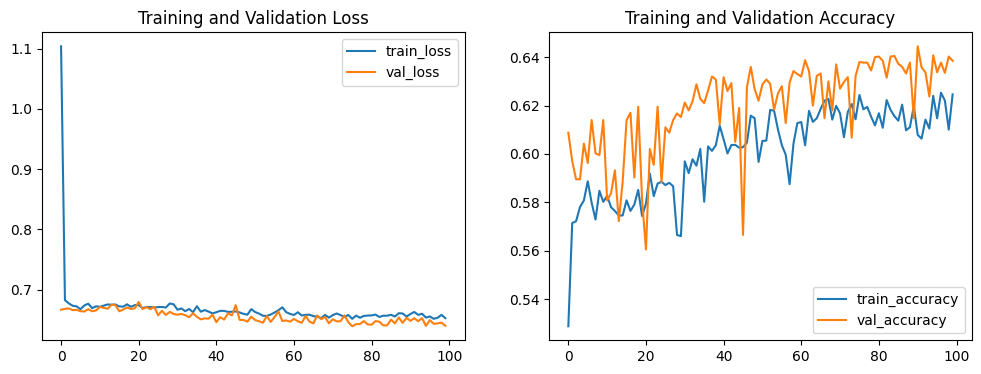

157/157 [==============================] - 2s 7ms/step


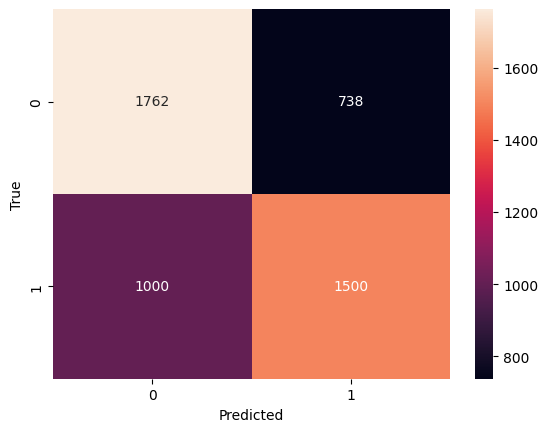

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=100, batch_size=128, validation_split=0.2)
# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l1, l2



# Load the ResNet101 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# unfreeze the several layers of the ResNet50 model
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Create a sequential model
model = Sequential()

# Add the base ResNet101 model
model.add(base_model)

# Add global average pooling layer
model.add(GlobalAveragePooling2D())

# Fully connected layers
model.add(Dense(4096, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
125/125 [==============================] - 5s 41ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.6625 - val_accuracy: 0.8180
Epoch 2/50
125/125 [==============================] - 5s 42ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.9174 - val_accuracy: 0.7850
Epoch 3/50
125/125 [==============================] - 5s 40ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.9982 - val_accuracy: 0.7878
Epoch 4/50
125/125 [==============================] - 5s 39ms/step - loss: 0.0622 - accuracy: 0.9798 - val_loss: 0.8838 - val_accuracy: 0.8018
Epoch 5/50
125/125 [==============================] - 5s 42ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.6922 - val_accuracy: 0.8210
Epoch 6/50
125/125 [==============================] - 5s 39ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 1.0084 - val_accuracy: 0.7715
Epoch 7/50
125/125 [==============================] - 5s 42ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.6760 - val_accuracy: 0.8085

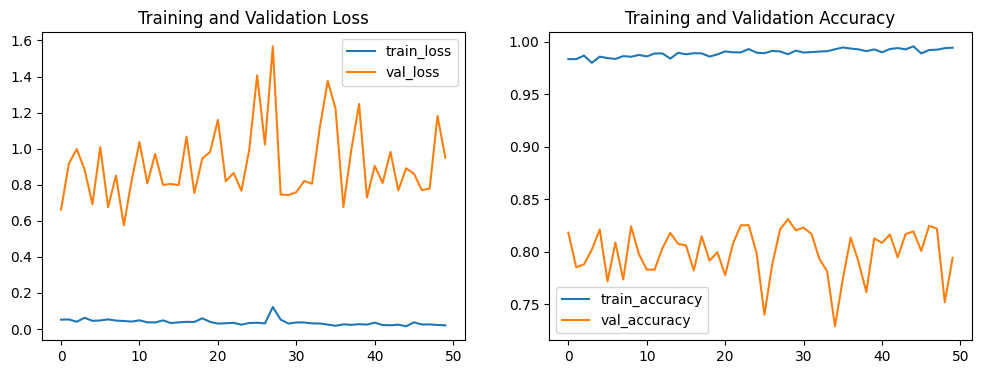

157/157 [==============================] - 1s 7ms/step


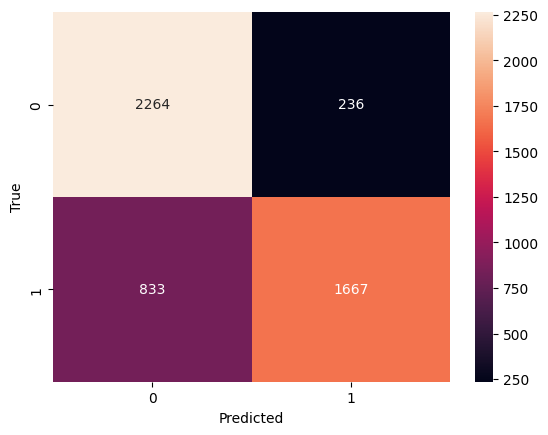

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=50, batch_size=128, validation_split=0.2)
# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()